In [167]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

In [168]:
def my_transform(im_ary, MA, target_m=1000, target_n=1000):
    """
    基于仿射变换的前向图变换
    :param im_ary: 输入图像
    :param MA: 仿射变换的变换矩阵
    :param target_m: 目标图像的行数
    :param target_n: 目标图像的列数
    :return: 
    """
    trans_matrix = MA
    # 输入图像的形状
    m,n,q = im_ary.shape
    new_img = np.zeros((target_m,target_n,3),dtype = 'int32')
    sum_changed = np.zeros((target_m,target_n))
    # 计算坐标（i，j）变换之后的新坐标，并通过前向图变换给新坐标赋值
    for i in tqdm(range(m)):
        for j in range(n):
            # 输入图像的坐标向量
            vector = np.array([i,j,1]).reshape(3,1)
            # 变换后得到的目标图像的坐标向量
            newvect = np.dot(trans_matrix,vector)
            new_i = int(np.round(newvect[0]))
            new_j = int(np.round(newvect[1]))
            # 边界判断
            if new_i >= target_m or new_j >= target_n or new_i < 0 or new_j < 0:
                continue
            # 前向图赋值
            if sum_changed[new_i,new_j] == 0:
                sum_changed[new_i,new_j] += 1
                new_img[new_i,new_j,0] = int(im_ary[i,j,0])
                new_img[new_i,new_j,1] = int(im_ary[i,j,1])
                new_img[new_i,new_j,2] = int(im_ary[i,j,2])
    return new_img

In [169]:
def Shear(alpha=0,beta=0):
    # 错切
    trans_matrix1 = np.eye(3)
    trans_matrix1[1,0] = alpha
    trans_matrix2 = np.eye(3)
    trans_matrix2[0,1] = beta
    return np.dot(trans_matrix1, trans_matrix2)

def Scaling(sx=1,sy=1):
    # 放缩
    trans_matrix = np.eye(3)
    trans_matrix[0,0] = sx
    trans_matrix[1,1] = sy
    return trans_matrix

def Translation(x=0,y=0):
    # 平移
    trans_matrix = np.eye(3)
    trans_matrix[0,2] = x
    trans_matrix[1,2] = y
    return trans_matrix

def Rotation(theta=0):
    # 旋转
    trans_matrix = np.eye(3)
    trans_matrix[0,0] = np.cos(theta)
    trans_matrix[0,1] = np.sin(theta)
    trans_matrix[1,1] = np.cos(theta)
    trans_matrix[1,0] = -np.sin(theta)
    return trans_matrix

In [170]:
def Affine(parameters):
    # 仿射
    t1 = Shear(alpha=parameters['shear_a'], beta=parameters['shear_b'])
    t2 = Scaling(sx=parameters['scale_a'],sy=parameters['scale_b'])
    t3 = Translation(x=parameters['trans_a'],y=parameters['trans_b'])
    t4 = Rotation(theta=parameters['theta']) 
    trans_matrix = np.dot(t1,np.dot(t2,np.dot(t3,t4)))
    return trans_matrix

简单实验：

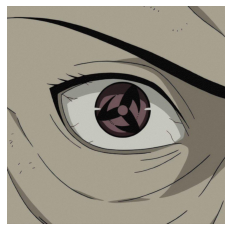

In [171]:
im = Image.open('./photo.jpg')
im_ary = np.array(im, dtype='int32')
plt.imshow(im_ary )
plt.axis("off")
plt.show()

放缩变换

In [172]:
t1 = Scaling(sx=1.5,sy=1.5)
MA1 = t1[:2,:]
#需要插值，不然图像中会有黑色点

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.59it/s]


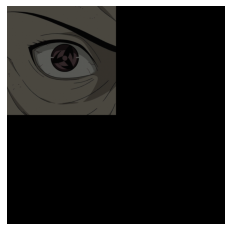

In [173]:
new_img = my_transform(im_ary,MA1, target_m=3000, target_n=3000)
plt.imshow(new_img)
plt.axis("off")
plt.savefig('fig1.png')

In [174]:
t1 = Scaling(sx=0.8,sy=0.8)
MA1 = t1[:2,:]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.52it/s]


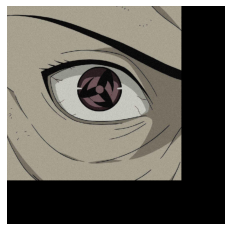

In [175]:
new_img = my_transform(im_ary,MA1, target_m=1000, target_n=1000)
plt.imshow(new_img)
plt.axis("off")
plt.savefig('fig2.png')

旋转变换

In [178]:
t2 = Rotation(theta=np.pi/6)
MA2 = t2[:2,:]
#以原点为中心顺时针旋转theta

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 92.43it/s]


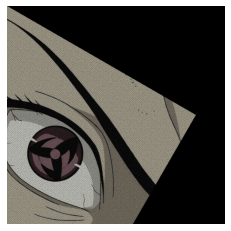

In [179]:
new_img = my_transform(im_ary,MA2, target_m=1000, target_n=1000)
plt.imshow(new_img)
plt.axis("off")
plt.savefig('fig3.png')

平移变换

In [180]:
t2 = Translation(x=250,y=250)
MA2 = t2[:2,:]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.27it/s]


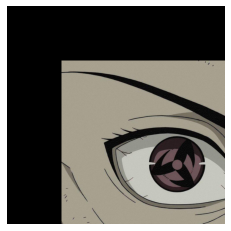

In [181]:
new_img = my_transform(im_ary,MA2, target_m=1000, target_n=1000)
plt.imshow(new_img)
plt.axis("off")
plt.savefig('fig4.png')

错切变换

In [184]:
t3 = Shear(alpha=0.1, beta=0.1)
MA3 = t3[:2,:]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 79.05it/s]


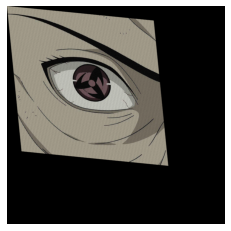

In [185]:
new_img = my_transform(im_ary,MA3, target_m=1500, target_n=1500)
plt.imshow(new_img)
plt.axis("off")
plt.savefig('fig5.png')

仿射变换

In [186]:
parameters = {}
parameters['theta'] = np.pi/6
parameters['scale_a'], parameters['scale_b'] = 1.5, 1.5
parameters['shear_a'], parameters['shear_b'] = 0.2, 0.2
parameters['trans_a'], parameters['trans_b'] = 600, 600

In [187]:
t4 = Affine(parameters)
MA4 = t4[:2,:]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 77.98it/s]


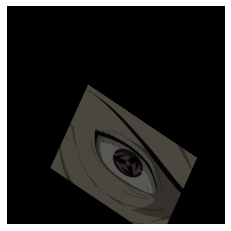

In [188]:
new_img = my_transform(im_ary,MA4, target_m=3000, target_n=3000)
plt.imshow(new_img)
plt.axis("off")
plt.savefig('fig6.png')

局部仿射变化：

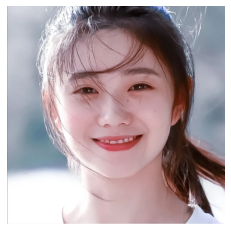

In [200]:
im1 = Image.open('lhc.png')
im_ary1 = np.array(im1, dtype='int32')
new_image1 = plt.imshow(im_ary1)
plt.axis("off")
plt.show()

In [201]:
m_1,n_1,q_1 = im_ary1.shape

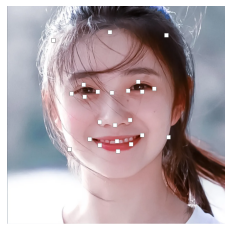

In [202]:
new_ary1 = im_ary1.copy()
# 鼻子
new_ary1[420:440,510:530] = 0  # 上
new_ary1[580:600,525:545] = 0  # 下
new_ary1[565:585,450:470] = 0  # 左
new_ary1[555:575,600:620] = 0  # 右
# 左眼
new_ary1[380:400,370:390] = 0  # 上
new_ary1[440:460,375:395] = 0  # 下
new_ary1[425:445,310:330] = 0  # 左
new_ary1[415:435,440:460] = 0  # 右
# 右眼
new_ary1[365:385,640:660] = 0  # 上
new_ary1[415:435,660:680] = 0  # 下
new_ary1[410:430,590:610] = 0  # 左
new_ary1[400:420,720:740] = 0  # 右
# 嘴巴
new_ary1[650:670,400:420] = 0
new_ary1[680:700,450:470] = 0
new_ary1[710:730,540:560] = 0
new_ary1[675:695,605:625] = 0
new_ary1[630:650,660:680] = 0
# 舌头
new_ary1[660:680,535:555] = 0
# 耳朵（左）
new_ary1[160:180,220:240] = 0
# 耳朵（右）
new_ary1[135:155,780:800] = 0
# 头顶
new_ary1[120:140,500:520] = 0
# 下巴（左）
new_ary1[700:720,300:320] = 0
# 下巴（右）
new_ary1[640:660,790:810] = 0

plt.imshow(new_ary1)
plt.axis("off")
plt.savefig('fig7.png')

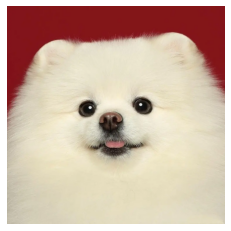

In [203]:
im2 = Image.open('cutedog.png')
im_ary2 = np.array(im2, dtype='int32')
new_image2 = plt.imshow(im_ary2)
plt.axis("off")
plt.show()

In [204]:
m_2,n_2,q_2 = im_ary2.shape

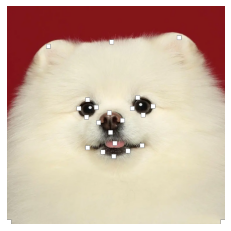

In [205]:
new_ary2 = im_ary2.copy()
# 鼻子
new_ary2[480:500,460:480] = 0  # 上
new_ary2[570:590,465:485] = 0  # 下
new_ary2[525:545,410:430] = 0  # 左
new_ary2[515:535,520:540] = 0  # 右
# 左眼
new_ary2[420:440,360:380] = 0  # 上
new_ary2[500:520,355:375] = 0  # 下
new_ary2[460:480,320:340] = 0  # 左
new_ary2[455:475,400:420] = 0  # 右
# 右眼
new_ary2[410:430,590:610] = 0  # 上
new_ary2[490:510,615:635] = 0  # 下
new_ary2[460:480,565:585] = 0  # 左
new_ary2[450:470,660:680] = 0  # 右
# 嘴巴
new_ary2[640:660,360:380] = 0
new_ary2[660:680,430:450] = 0
new_ary2[680:700,480:500] = 0
new_ary2[655:675,545:565] = 0
new_ary2[630:650,610:630] = 0
# 舌头
new_ary2[620:640,485:505] = 0
# 耳朵（左）
new_ary2[175:195,180:200] = 0
# 耳朵（右）
new_ary2[135:155,780:800] = 0
# 头顶
new_ary2[155:175,470:490] = 0
# 下巴（左）
new_ary2[980:1000,0:20] = 0
# 下巴（右）
new_ary2[980:1000,980:1000] = 0

plt.imshow(new_ary2)
plt.axis("off")
plt.savefig('fig8.png')

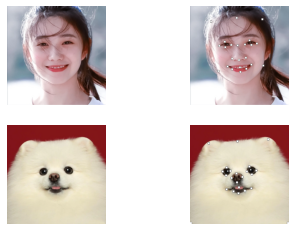

In [208]:
plt.subplot(221)
plt.imshow(im_ary1)
plt.axis("off")

plt.subplot(222)
plt.imshow(new_ary1)
plt.axis("off")

plt.subplot(223)
plt.imshow(im_ary2)
plt.axis("off")

plt.subplot(224)
plt.imshow(new_ary2)
plt.axis("off")
plt.savefig('fig14.png')

In [85]:
G = []
# 鼻子
G1 = np.array([490,470])
G.append(G1)
G2 = np.array([580,475])
G.append(G2)
G3 = np.array([535,420])
G.append(G3)
G4 = np.array([525,530])
G.append(G4)
# 左眼
G5 = np.array([430,370])
G.append(G5)
G6 = np.array([510,365])
G.append(G6)
G7 = np.array([470,330])
G.append(G7)
G8 = np.array([465,410])
G.append(G8)
# 右眼
G9 = np.array([420,600])
G.append(G9)
G10 = np.array([500,625])
G.append(G10)
G11 = np.array([470,575])
G.append(G11)
G12 = np.array([460,670])
G.append(G12)
# 嘴巴
G13 = np.array([650,370])
G.append(G13)
G14 = np.array([670,440])
G.append(G14)
G15= np.array([690,490])
G.append(G15)
G16 = np.array([665,555])
G.append(G16)
G17= np.array([640,620])
G.append(G17)
# 舌头
G18 = np.array([630,495])
G.append(G18)
# 耳朵（左）
G19 = np.array([185,190])
G.append(G19)
# 耳朵（右）
G20 = np.array([145,790])
G.append(G20)
# 头顶
G21 = np.array([165,480])
G.append(G21)
# 下巴（左）
G22 = np.array([990,10])
G.append(G22)
# 下巴（右）
G23 = np.array([990,990])
G.append(G23)

In [86]:
target_m = m_2
target_n = n_2
new_image = np.zeros((m_2,n_2,4),dtype='int32')
# 鼻子
new_image[480:500,460:480] = im_ary1[420:440,510:530]  # 上
new_image[570:590,465:485] = im_ary1[580:600,525:545]  # 下
new_image[525:545,410:430] = im_ary1[565:585,450:470]  # 左
new_image[515:535,520:540] = im_ary1[555:575,600:620]  # 右
# 左眼
new_image[420:440,360:380] = im_ary1[380:400,370:390]  # 上
new_image[500:520,355:375] = im_ary1[440:460,375:395]  # 下
new_image[460:480,320:340] = im_ary1[425:445,310:330]  # 左
new_image[455:475,400:420] = im_ary1[415:435,440:460]  # 右
# 右眼
new_image[410:430,590:610] = im_ary1[365:385,640:660]  # 上
new_image[490:510,615:635] = im_ary1[415:435,660:680]  # 下
new_image[460:480,565:585] = im_ary1[410:430,590:610]  # 左
new_image[450:470,660:680] = im_ary1[400:420,720:740]  # 右
# 嘴巴
new_image[640:660,360:380] = im_ary1[650:670,400:420]
new_image[660:680,430:450] = im_ary1[680:700,450:470]
new_image[680:700,480:500] = im_ary1[710:730,540:560]
new_image[655:675,545:565] = im_ary1[675:695,605:625]
new_image[630:650,610:630] = im_ary1[630:650,660:680]
# 舌头
new_image[620:640,485:505] = im_ary1[660:680,535:555]
# 耳朵（左）
new_image[175:195,180:200] = im_ary1[160:180,220:240]
# 耳朵（右）
new_image[135:155,780:800] = im_ary1[135:155,780:800]
# 头顶
new_image[155:175,470:490] = im_ary1[120:140,500:520]
# 下巴（左）
new_image[980:1000,0:20] = im_ary1[700:720,300:320]
# 下巴（右）
new_image[980:1000,980:1000] = im_ary1[640:660,790:810]

In [87]:
for i in tqdm(range(target_m)):
    for j in range(target_n):
        liule = False
        # 前向图中的坐标向量
        point = np.array([i,j])
        # G中存储浮动图像选择区域中心点的坐标向量
        for item in G:
            symbol = point == item
            if symbol.sum()==2:
                liule = True
                break  
        # 区域中心点直接赋值
        if liule == True:
            continue
        # 计算坐标向量到选择点的距离
        distances = []
        for k in range(23):
            distances.append(np.linalg.norm(point-G[k])**2)
        distances = np.array(distances)
        indexs = np.argsort(distances) # 根据距离大小顺序获得下标
        # 根据局部仿射变换公式计算新的坐标向量
        w_G = []
        new_distances = []
        for iter in range(4): #取前四个点
            index = indexs[iter]
            w_G.append(1/distances[index]*G[index])
            new_distances.append(distances[index])
        sums = np.sum(1/np.array(new_distances))
        w_G = np.array(w_G)/sums
        # 新的坐标向量
        newvector = np.round(np.sum(w_G,axis=0))
        new_i = int(np.round(newvector[0]))
        new_j = int(np.round(newvector[1]))
        if new_i >= target_m or new_j >= target_n or new_i < 0 or new_j < 0:
            continue
        #前向图给新的坐标向量赋予像素值
        new_image[new_i,new_j] = im_ary2[i,j]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:54<00:00,  3.40it/s]


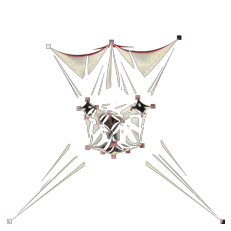

In [90]:
plt.imshow(new_image)
plt.axis("off")
plt.savefig('fig9.png')

反向图传播

In [1]:
def get_coord(shape):
    """
    获得浮动图片的所有坐标
    :param shape: 图片形状
    :return:
    """
    # 只考虑二维图片
    m,n = shape
    seq_x = np.arange(m,dtype='int32')
    seq_y = np.arange(n,dtype='int32')
    x, y = np.meshgrid(seq_x,seq_y)
    # 坐标矩阵
    coord = np.stack((np.transpose(x),np.transpose(y)))
    return coord

In [148]:
def linear_interpolation(new_coord, float_img):
    """
    线性插值拟合（从浮动图像到参考图像）
    :param new_coord: 坐标矩阵
    :param float_img: 浮动图像
    :return: 参考图像
    """
    coord_floor = np.floor(new_coord).astype(int)
    q_coord = new_coord - coord_floor
    # 可以广播到三通道图像
    get_img = lambda a,b: float_img[:,np.clip(a, 0, float_img.shape[1] - 1),np.clip(b, 0, float_img.shape[2] - 1)]
    # 双线性插值
    a = (1-q_coord[0]) * (1-q_coord[1]) * get_img(coord_floor[0], coord_floor[1])
    b = (1-q_coord[0]) * q_coord[1] * get_img(coord_floor[0], coord_floor[1]+1)
    c = q_coord[0] * (1-q_coord[1]) * get_img(coord_floor[0]+1, coord_floor[1])
    d = q_coord[0] * q_coord[1] * get_img(coord_floor[0]+1, coord_floor[1]+1)
    return a+b+c+d

In [153]:
def Trans_coord(M, coord):
    shape = coord.shape
    MA = M[:2,:2]
    Ts = M[:2,2].reshape((2,1))
    new_coord = np.dot(MA, coord.reshape(shape[0],-1)) + Ts
    return new_coord.reshape(shape)

仿射变换

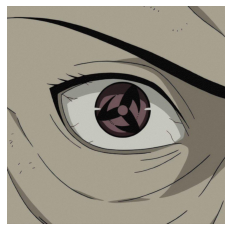

In [189]:
im = Image.open('./photo.jpg')
im_ary = np.array(im, dtype='int32')
plt.imshow(im_ary )
plt.axis("off")
plt.show()

In [190]:
new_ary = np.transpose(im_ary,(2,0,1))
new_ary.shape

(3, 1000, 1000)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.83it/s]


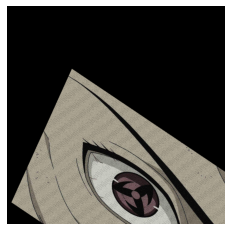

In [191]:
parameters = {}
parameters['theta'] = np.pi/6
parameters['scale_a'], parameters['scale_b'] = 0.8, 0.8
parameters['shear_a'], parameters['shear_b'] = 0.2, 0.2
parameters['trans_a'], parameters['trans_b'] = 300, 300
t4 = Affine(parameters)
MA4 = t4[:2,:]
new_img = my_transform(im_ary,MA4, target_m=1000, target_n=1000)
plt.imshow(new_img)
plt.axis("off")
plt.savefig('fig10.png')

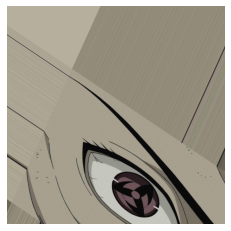

In [192]:
t5 = np.linalg.inv(t4)
MA5 = t5[:2,:]
img_coord = get_coord(im_ary.shape[:2])
new_coord = Trans_coord(MA5, img_coord)
deformed_img = linear_interpolation(new_coord, new_ary)
t_im = np.transpose(deformed_img,(1,2,0)).astype('int32')
plt.imshow(t_im)
plt.axis("off")
plt.savefig('fig11.png')

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.00it/s]


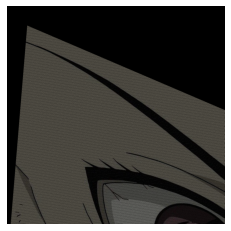

In [193]:
parameters = {}
parameters['theta'] = np.pi/12
parameters['scale_a'], parameters['scale_b'] = 1.5, 1.5
parameters['shear_a'], parameters['shear_b'] = 0.2, 0.2
parameters['trans_a'], parameters['trans_b'] = 50, 50
t4 = Affine(parameters)
MA4 = t4[:2,:]
new_img = my_transform(im_ary,MA4, target_m=1000, target_n=1000)
plt.imshow(new_img)
plt.axis("off")
plt.savefig('fig12.png')

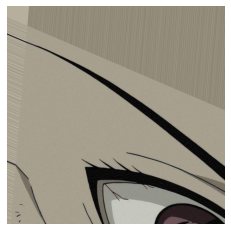

In [195]:
t5 = np.linalg.inv(t4)
MA5 = t5[:2,:]
img_coord = get_coord(im_ary.shape[:2])
new_coord = Trans_coord(MA5, img_coord)
deformed_img = linear_interpolation(new_coord, new_ary)
t_im = np.transpose(deformed_img,(1,2,0)).astype('int32')
plt.imshow(t_im)
plt.axis("off")
plt.savefig('fig13.png')